In [71]:
##Importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [72]:
##Creating training data
X = np.empty((1,1,3), int)
Y = np.empty((1,1,3), int)

In [73]:
X[0]

array([[255, 255, 153]])

In [74]:
##Shades of red
X = np.append(X , [[[255,0,0]]], 1)
X = np.append(X , [[[204,0,0]]], 1) #dark
X = np.append(X , [[[153,0,0]]], 1)
X = np.append(X , [[[255,51,51]]], 1) #light
X = np.append(X , [[[255,102,102]]], 1)

##Shades of yellow
Y = np.append(Y , [[[255,255,0]]], 1) 
Y = np.append(Y , [[[204,204,0]]], 1) #dark
Y = np.append(Y , [[[255,255,153]]], 1) #light

##Deleting first row that was randomly initialised while creating array
X = np.delete(X,0,1)
Y = np.delete(Y,0,1)

In [75]:
X[0][4]

array([255, 102, 102])

In [76]:
#Generating one final array by combining all shades
RY = np.append(X, Y, 1) # Red Yellow
GT = np.roll(RY, 1, 2) # Green Teal
BP = np.roll(GT, 1, 2) # Blue Pink

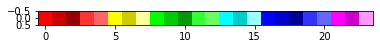

In [77]:
input_colors = np.append(RY, GT, axis = 1)
input_colors = np.append(input_colors, BP, axis = 1)
plt.imshow(input_colors)

In [78]:
input_colors.shape

(1, 24, 3)

In [79]:
#Standardizing the input between 0 and 1
X_train = input_colors/ input_colors.max()
X_train = X_train.reshape(3,24)

In [80]:
X_train.shape

(3, 24)

In [81]:
network_dimensions = np.array([100, 100]) ##Dimensions of the network in 2D
n_epochs = 5 ##No. of epochs
learning_rate = 0.8 ##Initial learning rate that is initialized as alpha0
m = 3 #No. of rows
n = 24 #No. of columns


##Here the value of sigma can be changed to modify the results
sigma = 70 #Different values of sigma for preparing report. Change the value of sigma here
sigma70 = {}

In [82]:
##Initializing the weight matrix in 3D
weight_matrix = np.random.random((network_dimensions[0], network_dimensions[1], m))

In [83]:
##Function to get the winning neuron and its index
def winning_neuron(t):
    
    WN_index = np.array([0, 0])
    
    #Initializing minimum distance to be maximum so that it can be updated in first go
    min_dist = np.iinfo(np.int).max
    
    # calculating the distance between each neuron and the input value
    for x in range(weight_matrix.shape[0]):
        for y in range(weight_matrix.shape[1]):
            w = weight_matrix[x, y, :].reshape(m, 1)
            sq_dist = np.sqrt(np.sum((w - t) ** 2))
            
            if sq_dist < min_dist:
                min_dist = sq_dist # dist
                WN_index = np.array([x, y]) # id
    
    ##Getting the index of the winning neuron
    WN = weight_matrix[WN_index[0], WN_index[1], :].reshape(m, 1)
    return (WN, WN_index)

In [84]:
#Function that decays the radius according to the formula provided with varying number of epochs
def decay_radius(sigma, i, n_epochs):
    return sigma * np.exp(-i / n_epochs)

#Function that decays the learning rate according to the formula provided with varying number of epochs
def decay_learning_rate(learning_rate, i, n_epochs):
    return learning_rate * np.exp(-i / n_epochs)

#Function that calcualtes the neighbourhood according to the formula provided 
def calculate_influence(distance, radius):
    return np.exp(-(distance**2) / (2* (radius**2)))

In [ ]:
for i in range(n_epochs):
    
    # Decaying sigma and learning rate
    sigma_i = decay_radius(sigma, i, n_epochs)
    learning_rate_i = decay_learning_rate(learning_rate, i, n_epochs)
    
    #Training on input data
    for j in range(24):
        
        #Getting input
        t = X_train[:, j].reshape(np.array([m, 1]))

        # finding winning neuron and winning index
        WN, WN_index = winning_neuron(t)
        
        ##Updating weight parameters
        for x in range(weight_matrix.shape[0]):
            for y in range(weight_matrix.shape[1]):
                w = weight_matrix[x, y, :].reshape(m, 1)
                w_dist = np.sqrt(np.sum((np.array([x, y]) - WN_index) ** 2))
               
                # calculating the degree of influence with the neighbourhood function provided
                influence = calculate_influence(w_dist, sigma_i)

                # Updating weights of the matrix
                new_w = w + (learning_rate_i * influence * (t - w))
                weight_matrix[x, y, :] = new_w.reshape(1, 3)
       
    #Printing weights matrix at desired epochs
    if(i== 0 or i== 3 or i== 99 or i==499 or i== 799 or  i==999):
        print("SOM for i = " + str(i+1))
        
        ##Storing weights in dictionary so as to save the weights for later use
        sigma70[i+1] = np.copy(weight_matrix) 
        
        #Printing weight grid
        plt.imshow(weight_matrix)
        plt.show()

## For sigma = 1

In [85]:
import pickle
a_file = open("sigma1.pkl", "rb")
output = pickle.load(a_file)

Weights grid after epoch = 20


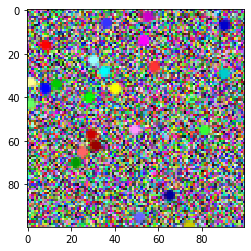

Weights grid after epoch = 40


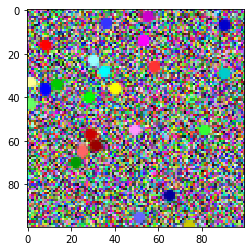

Weights grid after epoch = 100


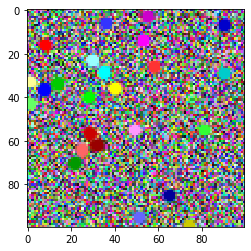

Weights grid after epoch = 500


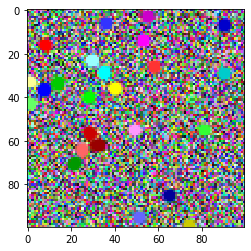

Weights grid after epoch = 800


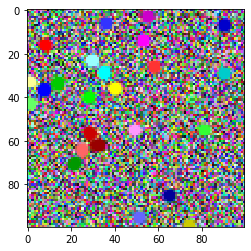

Weights grid after epoch = 1000


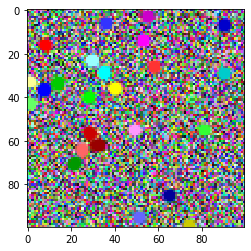

In [86]:
for i in [20, 40, 100, 500, 800, 1000]:
    print ("Weights grid after epoch = " + str(i))
    plt.imshow(output[i])
    plt.show()

## For sigma = 10

In [87]:
import pickle
a_file = open("sigma10.pkl", "rb")
output = pickle.load(a_file)

Weights grid after epoch = 20


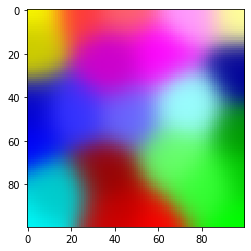

Weights grid after epoch = 40


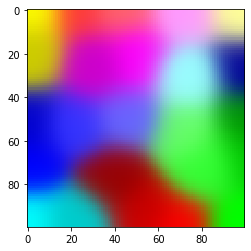

Weights grid after epoch = 100


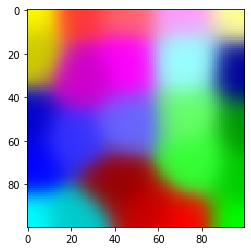

Weights grid after epoch = 500


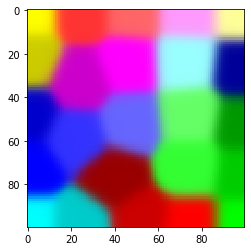

Weights grid after epoch = 800


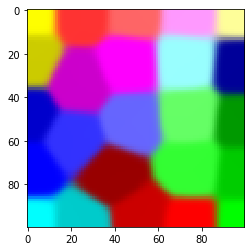

Weights grid after epoch = 1000


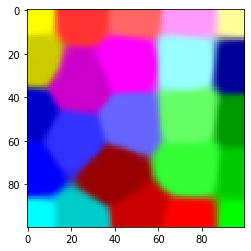

In [88]:
for i in [20, 40, 100, 500, 800, 1000]:
    print ("Weights grid after epoch = " + str(i))
    plt.imshow(output[i])
    plt.show()

## For sigma = 30

In [89]:
import pickle
a_file = open("sigma30.pkl", "rb")
output = pickle.load(a_file)

Weights grid after epoch = 20


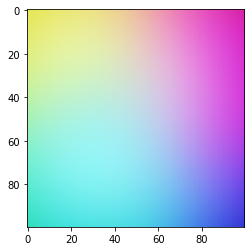

Weights grid after epoch = 40


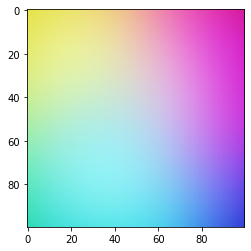

Weights grid after epoch = 100


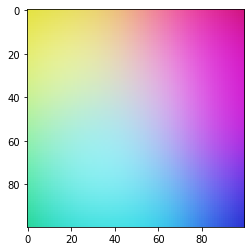

Weights grid after epoch = 500


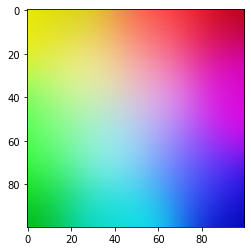

Weights grid after epoch = 800


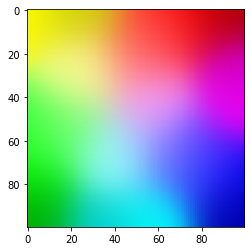

Weights grid after epoch = 1000


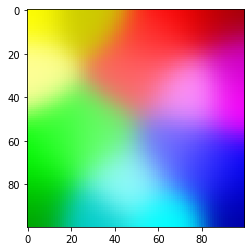

In [90]:
for i in [20, 40, 100, 500, 800, 1000]:
    print ("Weights grid after epoch = " + str(i))
    plt.imshow(output[i])
    plt.show()

## For sigma = 50

In [91]:
import pickle
a_file = open("sigma50.pkl", "rb")
output = pickle.load(a_file)

Weights grid after epoch = 20


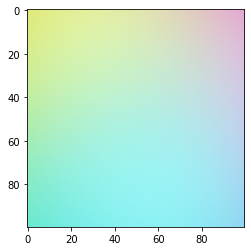

Weights grid after epoch = 40


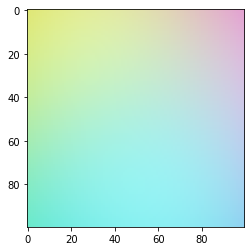

Weights grid after epoch = 100


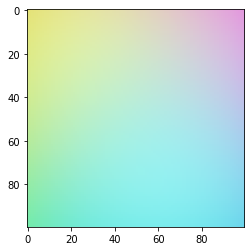

Weights grid after epoch = 500


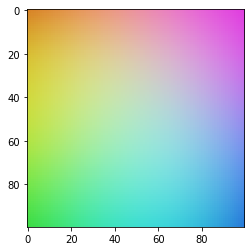

Weights grid after epoch = 800


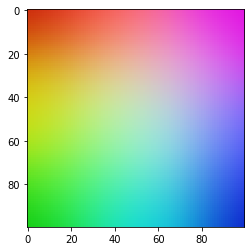

Weights grid after epoch = 1000


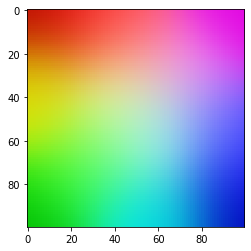

In [92]:
for i in [20, 40, 100,500, 800, 1000]:
    print ("Weights grid after epoch = " + str(i))
    plt.imshow(output[i])
    plt.show()

## For sigma = 70

In [93]:
import pickle
a_file = open("sigma70.pkl", "rb")
output = pickle.load(a_file)

Weights grid after epoch = 20


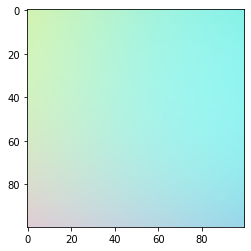

Weights grid after epoch = 40


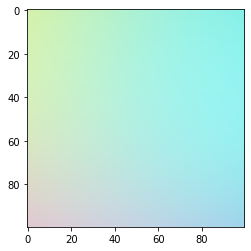

Weights grid after epoch = 100


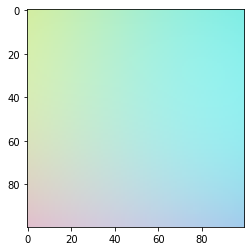

Weights grid after epoch = 500


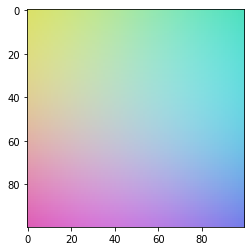

Weights grid after epoch = 800


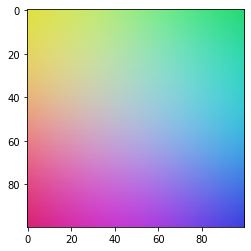

Weights grid after epoch = 1000


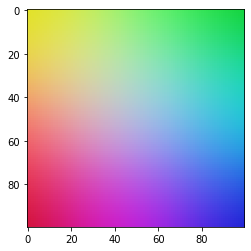

In [94]:
for i in [20, 40, 100,500, 800, 1000]:
    print ("Weights grid after epoch = " + str(i))
    plt.imshow(output[i])
    plt.show()

Effect of sigma can be clearly seen on the outputs. Proper value of sigma is important to fine tune the feature map and to provide accurate statistical quantification of the input space. If the value of sigma is very less, just like in case of 1, neighbourhood is least updated and yet with 1000 iterations, the desired output is not obtained. <br>
With sigma = 1, circles are seen, as neighburhood updated is close to none and hence, no learning is done. <br>
At sigma = 10 and 30, blurred images are obtained of the weight matrix. At sigma =10, no blending of colors takes place, and at sigma =30, there is slight blend of colors, however, that is not the required output. <br>
However, with increasing values of sigma, neighbourhood is updated in the range of the sigma and desired output is obtained. With more epochs, sigma parameter is decreased so that learning decreases with epochs. <br>
At sigma = 50 and 70, more colors are shown in the final output. This is beacuse the neighbourhood function is more updated. At Sigma =50 and 70, there is right blend of colors. <br>
There is relation between the learning of SOM and number of epochs. It can be clearly seen that the maximum learning is obtained at 1000 epochs. At 20 epochs, learning is very little and output is far away from the goal. At about 500 epochs, blending and separation of colors could be seen. Considering the example of sigma = 50, after 100th epoch, still a sort of few solid colors is seen. More learning is required to get the desired output. And at nearly 800 epochs, shifting towards goal could be seen and finally after 1000 epochs, the output is shown above. So, number of epochs should be choosen wisely along with sigma parameter to get the desired results. The learning of SOM depends heavily on these parameters.


